This data contains climate information from 2013 to 2017 in indian
have 4 features

*   Tempreture
*   Humadity
*   Wind speed
*   Presure

dataset = 1461 sample


https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NTI_datasets/Daily_climate_time_series/DailyDelhiClimateTrain.csv")
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


# Data Analysis

In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:

df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.571951,0.306468,-0.038818
humidity,-0.571951,1.000000,-0.373972,0.001734
wind_speed,0.306468,-0.373972,1.000000,-0.020670
meanpressure,-0.038818,0.001734,-0.020670,1.000000


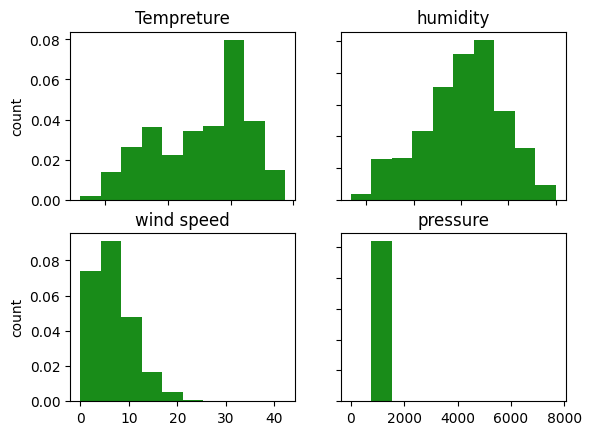

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist( df["meantemp"], bins = 10, density=True, alpha=0.9, color='g')
axs[0, 0].set_title('Tempreture')
axs[0, 1].hist( df["humidity"], bins = 10, density=True, alpha=0.9, color='g')
axs[0, 1].set_title('humidity')
axs[1, 0].hist( df["wind_speed"], bins = 10, density=True, alpha=0.9, color='g')
axs[1, 0].set_title('wind speed')
axs[1, 1].hist( df["meanpressure"], bins = 10, density=True, alpha=0.9, color='g')
axs[1, 1].set_title('pressure')

for ax in axs.flat:
    ax.set(xlabel='', ylabel='count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<Axes: xlabel='meanpressure'>

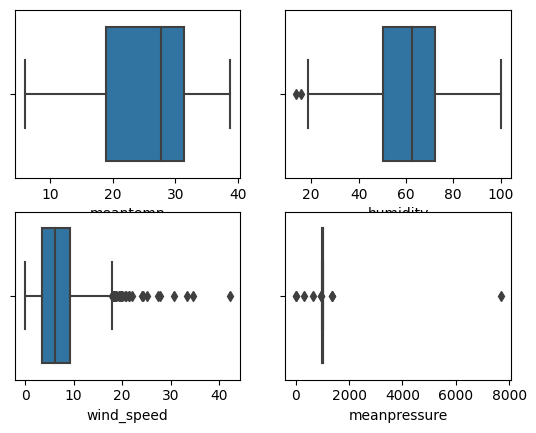

In [9]:
import seaborn as  sns

fig, axes = plt.subplots(2, 2)
sns.boxplot(x=df["meantemp"], ax=axes[0,0])
sns.boxplot(x=df["humidity"], ax=axes[0,1])
sns.boxplot(x=df["wind_speed"], ax=axes[1,0])
sns.boxplot(x=df["meanpressure"], ax=axes[1,1])

<Axes: ylabel='meantemp'>

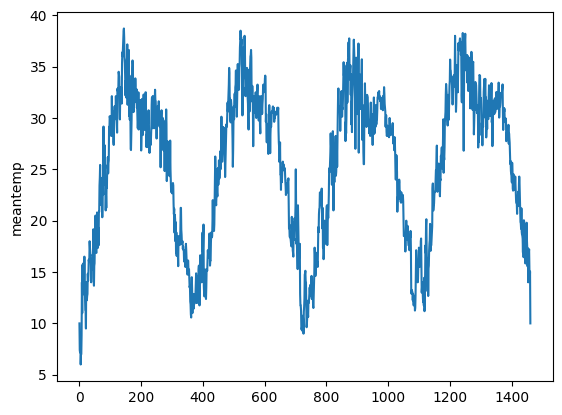

In [10]:
sns.lineplot(df["meantemp"] )

<Axes: ylabel='humidity'>

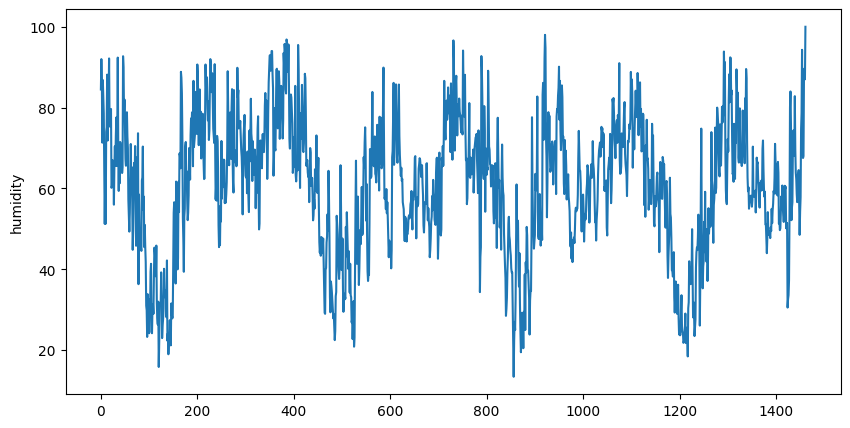

In [11]:
plt.figure(figsize = (10,5))
sns.lineplot(df["humidity"] )

<Axes: ylabel='wind_speed'>

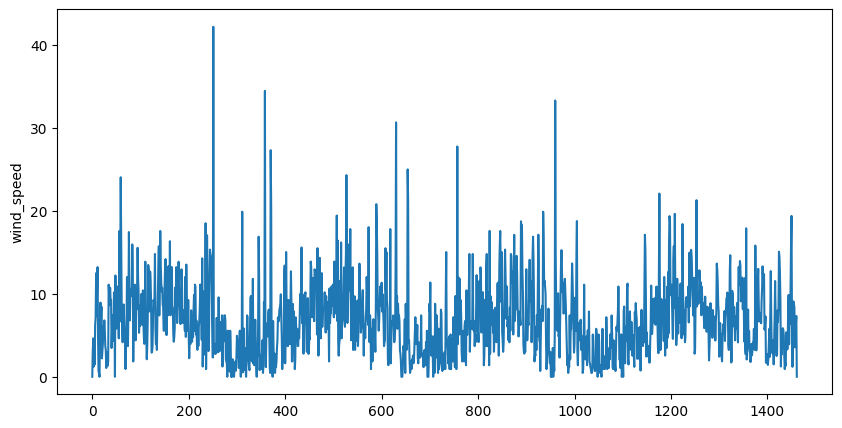

In [12]:
plt.figure(figsize = (10,5))
sns.lineplot(df["wind_speed"] )

<Axes: ylabel='meanpressure'>

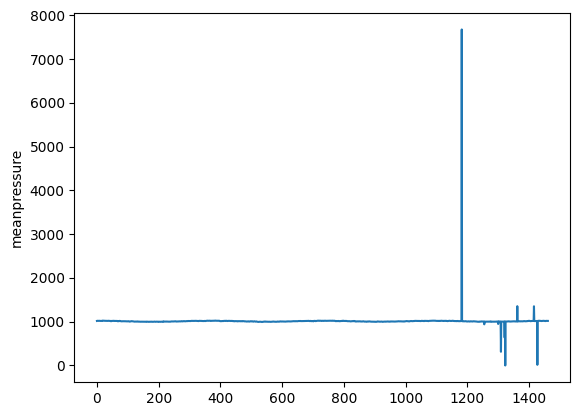

In [13]:
sns.lineplot(df["meanpressure"] )


In [14]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
result = adfuller(df["meantemp"], autolag='AIC')
print(f'temp p-value: {result[1]}')

result = adfuller(df["humidity"], autolag='AIC')
print(f'humidity p-value: {result[1]}')

result = adfuller(df["wind_speed"], autolag='AIC')
print(f'wind_speed p-value: {result[1]}')

result = adfuller(df["meanpressure"], autolag='AIC')
print(f'meanpressure p-value: {result[1]}')

temp p-value: 0.2774121372301601
humidity p-value: 0.004470100478130758
wind_speed p-value: 0.0025407221531463645
meanpressure p-value: 0.0


Try to predict **humidity** as p value = **0.004** **bold text**

# ARIMA

In [15]:
date = [i for i in range(len(df["date"]))]
humidity = df["humidity"]


df_data = pd.DataFrame(humidity, index =date, columns=['humidity'])
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X_train,X_test,y_train,y_test = train_test_split(date,humidity,test_size = 0.2, shuffle = False, random_state=42)
#print(len(X_train) + len(X_test))

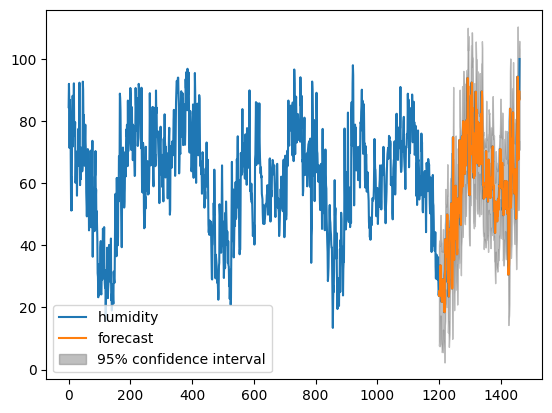

In [16]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df_data, order=(0, 1, 0))
results_ARIMA = model.fit()
#results_ARIMA.summary()
print(results_ARIMA)
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
fig, ax = plt.subplots()

ax = df_data.plot(ax=ax)
plot_predict(results_ARIMA,start=1200, ax=ax)

plt.show()

# LSTM


In [20]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

#X,Y
data = array(df["humidity"])

# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence(data, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, shuffle = False, random_state=42)


# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X_train, y_train, epochs=200, verbose=0)

# demonstrate prediction
yhat = model.predict(X_test, verbose=0)

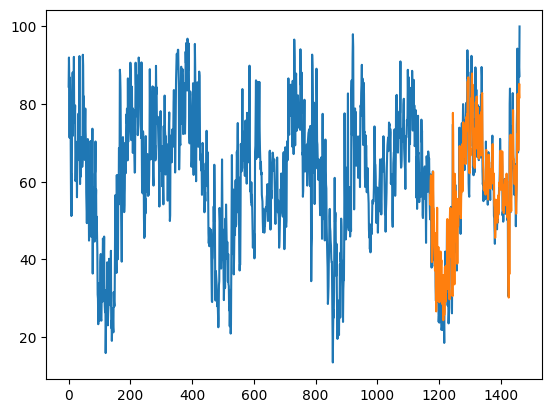

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = df["humidity"].plot(ax=ax)
#291
x_lable = [i for i in range(1171,1462)]
plt.plot(x_lable,yhat)
plt.show()